In [33]:
import pandas as pd

df = pd.read_csv("riskybet_2023-07-18T175453_425590.csv")

In [34]:
df.head()

,RunId,iteration,Step,grid_size,risk_adjustment,prob_risky_payoff,risky_bet,risk_min,risk_q1,risk_mean,risk_q3,risk_max,AgentID,risk_level,choice
0,0,0,0,10,adopt,0.335726,True,0.003284,0.204524,0.457705,0.707401,0.987907,NaN,NaN,NaN
1,0,0,1,10,adopt,0.000580,False,0.003284,0.204524,0.457705,0.707401,0.987907,0.0,0.185156,Bet.RISKY
2,0,0,1,10,adopt,0.000580,False,0.003284,0.204524,0.457705,0.707401,0.987907,1.0,0.710948,Bet.SAFE
3,0,0,1,10,adopt,0.000580,False,0.003284,0.204524,0.457705,0.707401,0.987907,2.0,0.763103,Bet.SAFE
4,0,0,1,10,adopt,0.000580,False,0.003284,0.204524,0.457705,0.707401,0.987907,3.0,0.782158,Bet.SAFE


In [35]:
last_step = df[df.Step == 100]
last_step

,RunId,iteration,Step,grid_size,risk_adjustment,prob_risky_payoff,risky_bet,risk_min,risk_q1,risk_mean,risk_q3,risk_max,AgentID,risk_level,choice
9901,0,0,100,10,adopt,0.008986,False,0.628171,0.667157,0.742527,0.792038,0.987907,0.0,0.763103,Bet.SAFE
9902,0,0,100,10,adopt,0.008986,False,0.628171,0.667157,0.742527,0.792038,0.987907,1.0,0.987907,Bet.SAFE
9903,0,0,100,10,adopt,0.008986,False,0.628171,0.667157,0.742527,0.792038,0.987907,2.0,0.987907,Bet.SAFE
9904,0,0,100,10,adopt,0.008986,False,0.628171,0.667157,0.742527,0.792038,0.987907,3.0,0.703855,Bet.SAFE
9905,0,0,100,10,adopt,0.008986,False,0.628171,0.667157,0.742527,0.792038,0.987907,4.0,0.987907,Bet.SAFE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400025,29,4,100,30,average,0.794222,False,0.362583,0.575560,0.628468,0.667873,0.999013,895.0,0.940166,Bet.SAFE
1400026,29,4,100,30,average,0.794222,False,0.362583,0.575560,0.628468,0.667873,0.999013,896.0,0.622660,Bet.RISKY
1400027,29,4,100,30,average,0.794222,False,0.362583,0.575560,0.628468,0.667873,0.999013,897.0,0.639917,Bet.RISKY
1400028,29,4,100,30,average,0.794222,False,0.362583,0.575560,0.628468,0.667873,0.999013,898.0,0.924706,Bet.SAFE


## overall risk distribution at end of simulations

<Axes: >

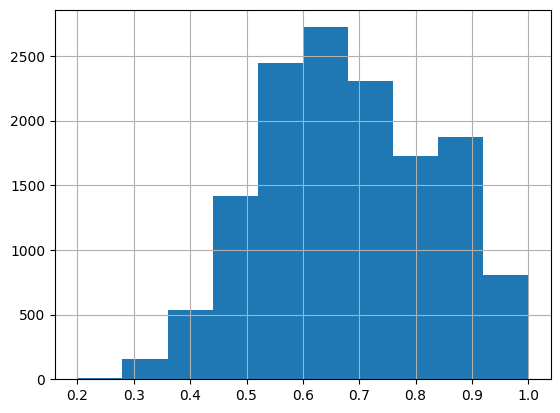

In [36]:
# overall ending risk distribution across all runs
last_step.risk_level.hist()

<Axes: >

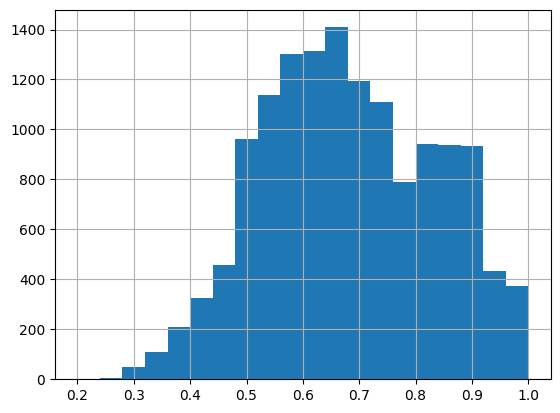

In [37]:
# does it look any different if we change the number of bins?
last_step.risk_level.hist(bins=20)

## histogram of ending risk levels for each simulation

In [38]:
last_step.RunId.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [39]:
len(last_step.RunId.unique())

30

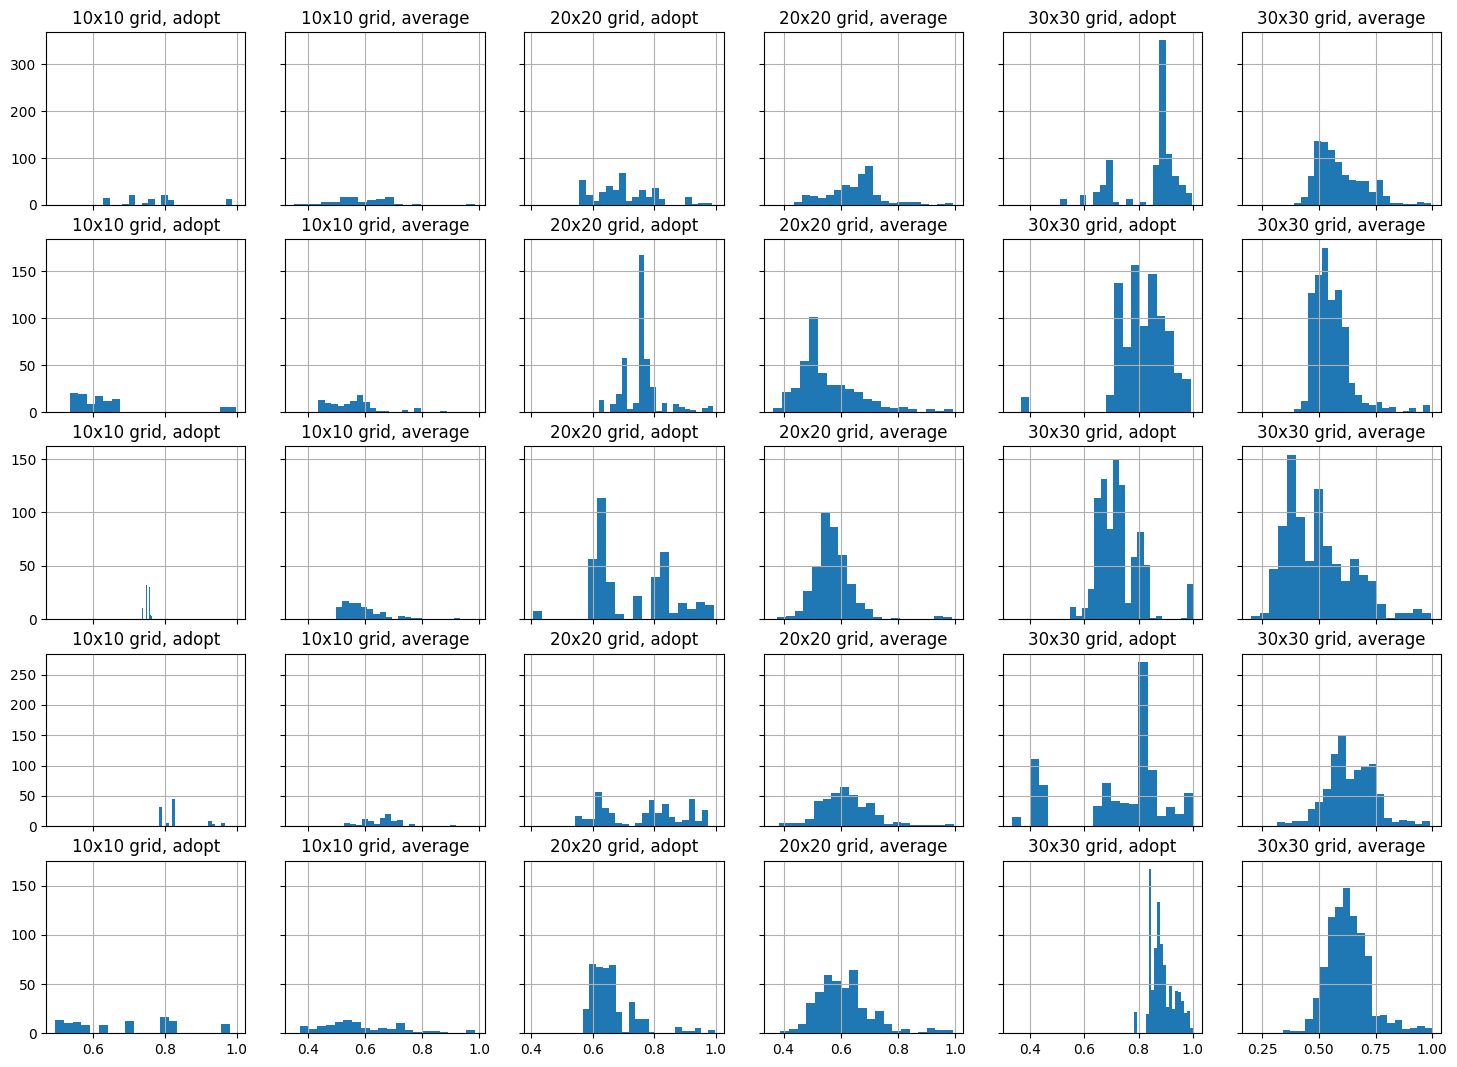

In [47]:
# plot a histogram of ending risk levels for each run
# combine into a grid of plots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 6, sharex='col', sharey='row', figsize=(18,13))

for run in last_step.RunId.unique():
    run_last_step = last_step[last_step.RunId == run]
    plot_location = ax[int(run/6), int(run % 6)]
    run_last_step.risk_level.hist(ax=plot_location, bins=20)
    # use grid size and risk adjustment strategy to title the plot
    grid_size = run_last_step.iloc[0].grid_size
    plot_location.set_title("%dx%d grid, %s" % (grid_size, grid_size, run_last_step.iloc[0].risk_adjustment))